<a href="https://colab.research.google.com/github/enjoyPG/2023Gifted/blob/main/students/DolBaKi/2-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###데이터 가공과 처리

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
fish_data=[[l,w] for l,w in zip(fish_length,fish_weight)] # 데이터 보기좋게 가공
fish_target=[1]*35+[0]*14

In [15]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier() #분류 머신러닝 들고옴

In [5]:
print(fish_data[4])

[29.0, 430.0]


In [7]:
print(fish_data[0:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [8]:
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [9]:
print(fish_data[44:])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [12]:
# 훈련 세트로 입력값 중 0~34번째 인덱스 사용
train_input=fish_data[:35]
# 훈련 세트로 타겟값 중 0~34번째 인덱스 사용
train_target=fish_target[:35]
# 테스트 세트로 입력값 중 35번째부터 마지막 인덱스 사용
test_input=fish_data[35:]
# 테스트 세트로 타겟값 중 35번재부터 마지막 인덱스 사용
test_target=fish_target[35:]

In [16]:
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

0.0

### 위 상황에서는 정확도가 0?! 다 이유가 있다고

먼저, 잘못된 이유는, 훈련 세트에는 도미, 테스트 세트에는 빙어만 있다

이 경우를 해결하기 위해서는, 훈련 세트, 테스트 세트에 도미, 빙어가 섞여야 한다

머신러닝도 그렇다. 사과만 훈련했는데 배를 넣으면 0이 뜨는 것과 같다.

### 이를 샘플링 편향(Sampling Bias)이라고 한다.

In [17]:
import numpy as np # 배열

In [18]:
input_arr=np.array(fish_data)
target_arr=np.array(fish_target)

In [19]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [20]:
print(input_arr.shape)

(49, 2)


In [25]:
np.random.seed(42) # 무작위로 섞는 시드 설정(지정되면 같은 값 나옴)
index=np.arange(49) # arnage에다 n 넣으면 0~n-1까지 1씩 증가하는 배열 만듦
np.random.shuffle(index) # 셔플은 배열 마구잡이로 섞기

In [27]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [28]:
print(input_arr[[1,3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


In [29]:
train_input=input_arr[index[:35]]
train_target=target_arr[index[:35]]

In [30]:
print(input_arr[13],train_input[0]) # 위에 print(index)에서 첫 값이 13

[ 32. 340.] [ 32. 340.]


In [36]:
test_input=input_arr[index[35:]]
test_target=target_arr[index[35:]]

<function matplotlib.pyplot.show(close=None, block=None)>

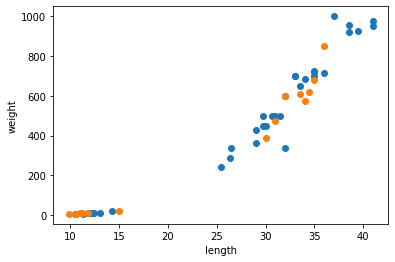

In [32]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show

In [33]:
kn.fit(train_input,train_target)

KNeighborsClassifier()

In [37]:
kn.score(test_input,test_target)

1.0

In [38]:
kn.predict(test_input) # 새 데이터 정답 출력

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [39]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])